# Fair Division of Indivisible Goods

This is a Jupyter Notebook coming along with the chapter 
* Chapter 12 (Handbook of Computational Social Choice)

To be used as part of the course of :
* The COST Summer School Lecture on Fair Division of Indivisible Items (San Sebastian, July 2016)
* COCOMA: M2 course at UPMC, 2016-2017

## 1. Defining MARA problems

By importing problem, we can define fair division problems, by specifying a number of agents, a number of resources, and a type of preferences/culture. 

You can either:
* define a **centralized** MARA problem (all the resources are initially held by agent 0, the auctioneer)
* define a **decentralized** MARA problem (resources are initially randomly allocated)

You can also select the method to generate utilities: 
* **uniform**: utilities for each resource is drawn uniformly at random from 1 to 100
* **normalized**: utilities are normalized in [0,1]
* **empty**: leaves utilites undefined. You can later use p.setUtilities() to set utilities as you wish for a problem p. 

In [31]:
from problem import Problem

In [32]:
p1 = Problem(3,4,'uniform',centralized=True)
print(p1)

agent 0{'r0': 82, 'r1': 52, 'r2': 37, 'r3': 29}
agent 1{'r0': 55, 'r1': 5, 'r2': 87, 'r3': 45}
agent 2{'r0': 50, 'r1': 44, 'r2': 12, 'r3': 62}



Printing the allocation allows to see which agent holds which resource, and the current utility of each agent. 

In [33]:
print(p1.printAllocation())


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0           ['r0', 'r1', 'r2', 'r3']	200
agent  1                                 []	 0
agent  2                                 []	 0



A problem also handles a **visibility graph** among agents. Note that in the centalized case, agent 0 is isolated from the rest (his utility is irrelevant). 

In [34]:
print (p1.visibility_graph)

{0: [], 1: [2], 2: [1]}


### Example of the course

In [35]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 0{'r4': 0, 'r5': 0, 'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0}
agent 1{'r4': 7, 'r5': 2, 'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3}
agent 2{'r4': 1, 'r5': 2, 'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1}
agent 3{'r4': 2, 'r5': 2, 'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0['r4', 'r5', 'r0', 'r1', 'r2', 'r3']	 0
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



## 2. Fairness measures

In [36]:
import fairnessMeasures

In [37]:
p2 = Problem(3,6,'normalized',centralized=False)
print(p2)

agent 0{'r4': 0.19, 'r5': 0.178, 'r0': 0.201, 'r1': 0.152, 'r2': 0.091, 'r3': 0.187}
agent 1{'r4': 0.245, 'r5': 0.305, 'r0': 0.011, 'r1': 0.337, 'r2': 0.057, 'r3': 0.046}
agent 2{'r4': 0.043, 'r5': 0.223, 'r0': 0.194, 'r1': 0.156, 'r2': 0.284, 'r3': 0.1}



In [38]:
print(p2.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                       ['r4', 'r3']	0.377
agent  1                             ['r5']	0.305
agent  2                 ['r0', 'r1', 'r2']	0.634



We can check various fairness properties...

In [39]:
print(fairnessMeasures.isProportional(p2))

False


In [40]:
print(fairnessMeasures.egalitarianSW(p2))

0.305


... and build the envy matrix from which several measures can be obtained. 

In [41]:
em = fairnessMeasures.envyMatrix(p2)
print(em)
print("There are ", fairnessMeasures.nbEnviousAgents(em), " envious agents")
print("The maximum envy among two agents is ", fairnessMeasures.maxEnvy(em))

[[ 0.     0.     0.067]
 [ 0.     0.     0.1  ]
 [ 0.     0.     0.   ]]
('There are ', 2, ' envious agents')
('The maximum envy among two agents is ', 0.10000000000000003)


### 2.1 Question

Create an instance involving 3 agents and 4 resources, with the following  utilities for the ressources : 
* agent 0: 6, 6, 1, 7
* agent 1: 1, 3, 9, 7
* agent 2: 8, 0, 4, 8

Find allocations which satisfies : 
* proportionality
* envy-freeness
* maximizes egalitarian social welfare
* maximizes utilitarian social welfare
* maximizes the Nash product

In [42]:
pr = Problem(3,4,'empty',centralized=False)
pr.setUtilities(
[{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pr)
pr.setAllocation(
[[False,True,False,True],\
[False,False,True,False],\
[True,False,False,False]
]
)
print(pr.printAllocation())

print("L'allocation est proportionnelle "if fairnessMeasures.isProportional(pr) else "L'allocation n'est pas proportionnelle" )

empr = fairnessMeasures.envyMatrix(pr)
print(empr)
print("There are ", fairnessMeasures.nbEnviousAgents(empr), " envious agents")
print("The maximum envy among two agents is ", fairnessMeasures.maxEnvy(empr))

print("Egalitarian social welfare : "+str(fairnessMeasures.egalitarianSW(pr)))
print("Utilitarian social welfare : "+str(pr.agent[0].current_u + pr.agent[1].current_u + pr.agent[2].current_u))
print("Nash social welfare : "+str(pr.agent[0].current_u * pr.agent[1].current_u * pr.agent[2].current_u))

agent 0{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 1{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 2{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                       ['r1', 'r3']	13
agent  1                             ['r2']	 9
agent  2                             ['r0']	 8

L'allocation est proportionnelle 
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
('There are ', 1, ' envious agents')
('The maximum envy among two agents is ', 1.0)
Egalitarian social welfare : 8
Utilitarian social welfare : 30
Nash social welfare : 936


## 3. Solving via MIP

By importing mipsolving we get access to functions allowing to optimally solve the problems via MIP formulations (see course). 
The program uses the Pulp libray for linear programming. 

In [43]:
import mipsolving

In [44]:
e3 = mipsolving.envyminimizingLP(p3,verbose=True)
print("the final max envy is ",e3)

('agent ', 1, ' gets resource r3')
('agent ', 1, ' gets resource r4')
('agent ', 2, ' gets resource r2')
('agent ', 2, ' gets resource r5')
('agent ', 3, ' gets resource r0')
('agent ', 3, ' gets resource r1')
('the final max envy is ', 0.0)


(Note that this has not modified the initial problem)

In [45]:
print(mipsolving.assignmentLP(p3,verbose=True))

('agent ', 1, ' gets resource r3')
('agent ', 1, ' gets resource r4')
('agent ', 2, ' gets resource r2')
('agent ', 2, ' gets resource r5')
('agent ', 3, ' gets resource r0')
('agent ', 3, ' gets resource r1')
9.0


For facilitating the run of several problems with varying or similar parameters, the module simulations provides a few functions. 

In [46]:
import simulations


### How likely is it to get an envy-free allocation? 

Let us illustrate this on a specific question, adressed by Dickerson et al. in their paper: 
* The computational Rise and Fall of Fairness, AAAI-2014

In [47]:
tested_resources = list(range(5,10)) # from 2 to 4 resources
tested_agents = [5] # only 2 agents
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


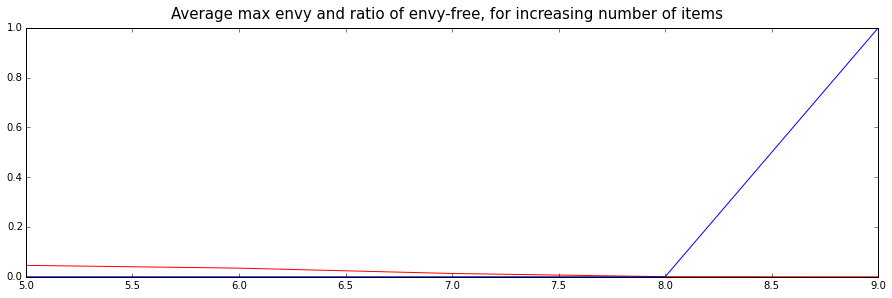

In [48]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red')
plt.plot(p, ratio_ef[0], color = 'blue')
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

### 3.1 Question
Play a little bit with these simulations and try to determine:
* for 2 agents, how the max envy evolves, from which number of agents you can be reasonably sure to get an envy-free allocation
* same question for 5 agents

## 4. Protocols

Several protocols have been implemented. They can be accessed by importing the module protocols. 

In [49]:
import protocols

### 4. 1 Picking Sequences

Let us apply a picking sequence on our problem p3. 

In [50]:
print(p3)
print (p3.printAllocation())

agent 0{'r4': 0, 'r5': 0, 'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0}
agent 1{'r4': 7, 'r5': 2, 'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3}
agent 2{'r4': 1, 'r5': 2, 'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1}
agent 3{'r4': 2, 'r5': 2, 'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0['r4', 'r5', 'r0', 'r1', 'r2', 'r3']	 0
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



It is also possible to generate standard sequences, like balanced or alternate ones. 

In [51]:
s= protocols.generateSequence(3,6,'balanced')
print(s)

[1, 2, 3, 3, 2, 1]


In [52]:
s0 = [1,2,3,2,3,1]

In [53]:
protocols.pickingSequence(p3,s0,verbose=True)

('agent ', 1, ' picks ', 'r4')
('agent ', 2, ' picks ', 'r2')
('agent ', 3, ' picks ', 'r0')
('agent ', 2, ' picks ', 'r1')
('agent ', 3, ' picks ', 'r3')
('agent ', 1, ' picks ', 'r5')


In [54]:
print(p3.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                                 []	 0
agent  1                       ['r4', 'r5']	 9
agent  2                       ['r2', 'r1']	14
agent  3                       ['r0', 'r3']	 8



In [55]:
print(fairnessMeasures.envyMatrix(p3))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### What is the fairest picking sequence?

In [56]:
import simulations

Let us consider 3 agents and 5 items. 
Can you propose some sequence which would do well in terms of egalitarian social welfare? 
You can simulate a number of picking sequences by specifying: the number of experiments, the number of agents (remember to count agent 0 here-to be fixed sorry), the number of objects, the sequence, and the ways utilities are generated. 

In [57]:
simulations.simulationPickingSequences(1000,4,5,[1,2,2,1,3],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                  2.93
= Ratio of proportional:                0.191
= Ratio of envy free:                    0.059
= Average number of envious:             0.941
= Average max envy:                      4.348
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



### Question
For 3 agents, and 5, 6, and 8 objects, could you find the fairest picking sequences in terms of: 
* egalitarian social welfare
* average max envy

In [107]:
#simulations.simulationPickingSequences(10000,4,5,[1,2,3,3,2],'borda',verbose=False)
#simulations.simulationPickingSequences(10000,4,6,[1,2,3,3,2,1],'borda',verbose=False)
simulations.simulationPickingSequences(50000,4,8,[1,1,2,3,2,3,3,2],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                50000
= Average egalitarian sw:              14.46434
= Ratio of proportional:               0.9799
= Ratio of envy free:                  0.87688
= Average number of envious:            0.1272
= Average max envy:                    0.23606
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



* See (Bouveret and Lang, IJCAI-11) for more details about this topic. 